# Support Vector Machine

In [17]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.filterwarnings(action='ignore')

In [14]:
# 사이킷런 모듈
from sklearn.svm import SVR, SVC # 회귀용, 분류용
from sklearn.datasets import load_boston, load_diabetes # 보스턴, 당뇨
from sklearn.datasets import load_breast_cancer, load_iris, load_wine # 유방암, 붓꽃, 와인
from sklearn.pipeline import make_pipeline, Pipeline # 파이프라인
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE # 시각화 

# SVM을 이용한 회귀 모델과 분류 모델

## SVM을 사용한 회귀 모델(SVR)

In [43]:
# 커널 종류에 따른 함수 대입
def SVR_type(kernel_li):
    for i in kernel_li:
        
        svr = SVR(kernel = i)
        svr.fit(X_train, y_train)

        print('{} SVR 학습 데이터 점수: {}'.format(i, svr.score(X_train, y_train)))
        print('{} SVR 평가 데이터 점수: {}'.format(i, svr.score(X_test, y_test)))
        print('****************************************************************')

In [44]:
# 보스턴 주택 가격
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

SVR_type(['linear', 'poly', 'rbf'])

linear SVR 학습 데이터 점수: 0.7155066205123104
linear SVR 평가 데이터 점수: 0.6380398541381507
****************************************************************
poly SVR 학습 데이터 점수: 0.2024454261446289
poly SVR 평가 데이터 점수: 0.133668450367462
****************************************************************
rbf SVR 학습 데이터 점수: 0.21772837063748762
rbf SVR 평가 데이터 점수: 0.13544178468518187
****************************************************************


-> linear의 학습 평가가 가장 좋음

## SVM를 사용한 분류 모델(SVC)

In [45]:
# 커널 종류에 따른 함수 대입
def SVC_type(kernel_li):
    for i in kernel_li:
        
        svc = SVC(kernel = i)
        svc.fit(X_train, y_train)

        print('{} SVC 학습 데이터 점수: {}'.format(i, svc.score(X_train, y_train)))
        print('{} SVC 평가 데이터 점수: {}'.format(i, svc.score(X_test, y_test)))
        print('****************************************************************')

In [46]:
# 유방암 데이터
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

SVC_type(['linear', 'poly', 'rbf'])

linear SVC 학습 데이터 점수: 0.960093896713615
linear SVC 평가 데이터 점수: 0.986013986013986
****************************************************************
poly SVC 학습 데이터 점수: 0.9014084507042254
poly SVC 평가 데이터 점수: 0.9230769230769231
****************************************************************
rbf SVC 학습 데이터 점수: 0.9014084507042254
rbf SVC 평가 데이터 점수: 0.9230769230769231
****************************************************************


-> 전부 90%가 넘지만 linear가 가장 좋음

## 매개변수 튜닝
- 매개변수 변경하면서 성능변화 관찰

In [47]:
# 커널 종류, 파라미터에 따른 함수 대입
def SVC_type_param(kernel_li, degree, c, gamma):
    for i in kernel_li:
        
        if i == 'rbf': #rbf는 degree가 없음
            svc = SVC(kernel = i, C = c, gamma = gamma)
            svc.fit(X_train, y_train)
        else:
            svc = SVC(kernel = i, degree = degree, C = c, gamma = gamma)
            svc.fit(X_train, y_train)

        print('{} SVC 학습 데이터 점수: {}'.format(i, svc.score(X_train, y_train)))
        print('{} SVC 평가 데이터 점수: {}'.format(i, svc.score(X_test, y_test)))
        print('****************************************************************')

In [48]:
# 유방암 데이터
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

SVC_type_param(['linear', 'poly', 'rbf'], 2, 0.1, 'auto')
print('---------파라미터 변경-------')
SVC_type_param(['linear', 'poly', 'rbf'], 2, 2, 'scale')

linear SVC 학습 데이터 점수: 0.9553990610328639
linear SVC 평가 데이터 점수: 0.986013986013986
****************************************************************
poly SVC 학습 데이터 점수: 0.9835680751173709
poly SVC 평가 데이터 점수: 0.993006993006993
****************************************************************
rbf SVC 학습 데이터 점수: 0.6291079812206573
rbf SVC 평가 데이터 점수: 0.6223776223776224
****************************************************************
---------파라미터 변경-------
linear SVC 학습 데이터 점수: 0.9624413145539906
linear SVC 평가 데이터 점수: 0.986013986013986
****************************************************************
poly SVC 학습 데이터 점수: 0.9131455399061033
poly SVC 평가 데이터 점수: 0.9370629370629371
****************************************************************
rbf SVC 학습 데이터 점수: 0.9154929577464789
rbf SVC 평가 데이터 점수: 0.9370629370629371
****************************************************************


-> 처음보다 파라미터를 변경했을 때 성능이 좋아짐

## 데이터 전처리
- SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
- 주로 모든 특성 값을 [0. 1] 범위로 맞추는 방법을 사용
- scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

### StandardScaler

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# 유방암 데이터

# scaler 전
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
print('StandardSacelr 전')
SVC_type(['linear', 'poly', 'rbf'])

# scaler 후

# stand
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('StandardSacelr 후')
SVC_type(['linear', 'poly', 'rbf'])

# minmax
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('MinMaxScaler 후')
SVC_type(['linear', 'poly', 'rbf'])

StandardSacelr 전
linear SVC 학습 데이터 점수: 0.960093896713615
linear SVC 평가 데이터 점수: 0.986013986013986
****************************************************************
poly SVC 학습 데이터 점수: 0.9014084507042254
poly SVC 평가 데이터 점수: 0.9230769230769231
****************************************************************
rbf SVC 학습 데이터 점수: 0.9014084507042254
rbf SVC 평가 데이터 점수: 0.9230769230769231
****************************************************************
StandardSacelr 후
linear SVC 학습 데이터 점수: 0.9906103286384976
linear SVC 평가 데이터 점수: 0.986013986013986
****************************************************************
poly SVC 학습 데이터 점수: 0.9061032863849765
poly SVC 평가 데이터 점수: 0.8881118881118881
****************************************************************
rbf SVC 학습 데이터 점수: 0.9835680751173709
rbf SVC 평가 데이터 점수: 0.986013986013986
****************************************************************
MinMaxScaler 후
linear SVC 학습 데이터 점수: 0.9765258215962441
linear SVC 평가 데이터 점수: 0.986013986013986
************

-> linear과 rbf가 scaler 후 성능이 향상됨/ poly는 minmax에서만 향상

# [실습 시작] 
# Linear SVR

# 1. 보스턴 주택가격 예측

In [61]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [63]:
SVR_type(['linear'])

linear SVR 학습 데이터 점수: 0.6982363483811425
linear SVR 평가 데이터 점수: 0.7098607040155547
****************************************************************


### 시각화 
TSNE : 저차원으로 변환 후 시각화하는 도구

- X, y의 분포도

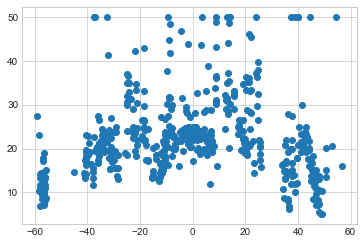

In [58]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

- SVR 결과 확인

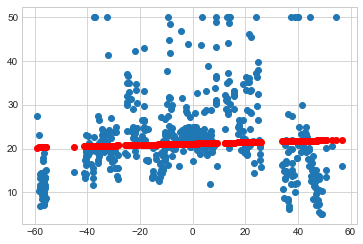

In [65]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r')

- 파이프라인으로 cross validation 확인

In [69]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    4.5s finished


{'fit_time': array([0.0159564 , 0.0159564 , 0.01396108, 0.01994729, 0.0159564 ]),
 'score_time': array([0.00199485, 0.00199485, 0.00099778, 0.00299191, 0.00299954]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

- gridsearchCV 활용

In [71]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01],
             'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [72]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

-> GridSearch로 최적의 파라미터 구함

# 2. 당뇨병 예측

In [73]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [75]:
SVR_type(['linear'])

linear SVR 학습 데이터 점수: 0.4893570903812825
linear SVR 평가 데이터 점수: 0.545132722831348
****************************************************************


### 시각화 
- X, y의 분포도

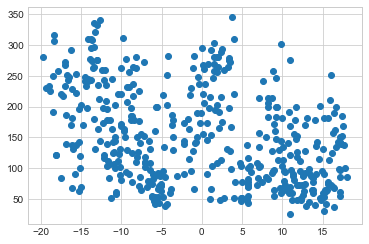

In [76]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

- SVR 결과 확인

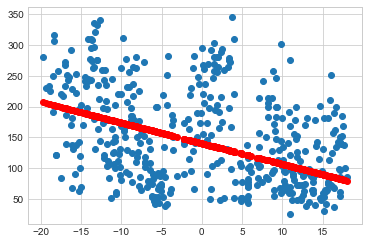

In [77]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r')

- 파이프라인으로 cross validation 확인

In [78]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01348042, 0.01048636, 0.01002359, 0.00948453, 0.0114975 ]),
 'score_time': array([0.00199437, 0.00250673, 0.0020113 , 0.00199819, 0.00199556]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

- 최적의 파라미터 찾기

In [79]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01],
             'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [80]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

# Kernel SVR
# 1. 보스턴 주택 가격

In [81]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [84]:
#전처리
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

SVR()

In [86]:
SVR_type(['rbf'])

rbf SVR 학습 데이터 점수: 0.6771887611005524
rbf SVR 평가 데이터 점수: 0.663873534924518
****************************************************************


### 시각화 

- X, y의 분포도

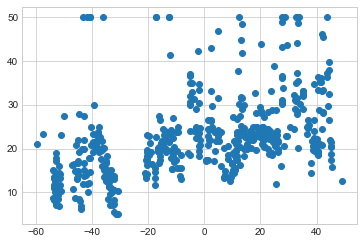

In [87]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

- SVR 결과 확인

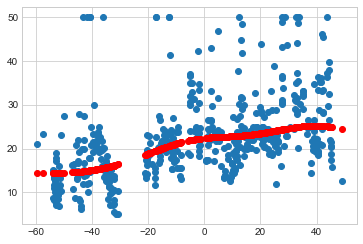

In [88]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r')

-> 비선형 특성으로 나타남

- 파이프라인으로 cross validation 확인

In [89]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    4.5s finished


{'fit_time': array([0.01692629, 0.01948237, 0.02400494, 0.02267146, 0.01927829]),
 'score_time': array([0.0094924 , 0.00750256, 0.01230264, 0.00800657, 0.00838614]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

- gridsearchCV 활용

In [94]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'rbf'))]) #기본이 rbf _ 입력 안해줘도 됨

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01],
             'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [95]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

-> GridSearch로 최적의 파라미터 구함

# 2. 당뇨병

In [97]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [98]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

SVR()

In [99]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.1810440976410811
평가 데이터 점수: 0.13819559628913136


### 시각화 
- X, y의 분포도

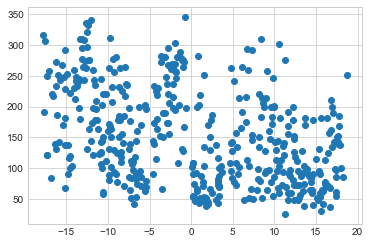

In [100]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

- SVR 결과 확인

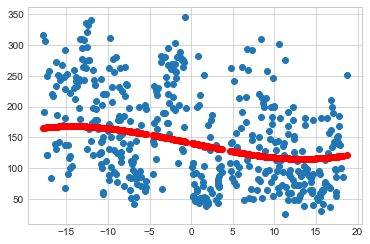

In [101]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r')

-> 데이터가 많이 퍼져있어 맞추기 어려움_비선형으로 나왔으나 예측 결과가 많이 떨어짐

- 파이프라인으로 cross validation 확인

In [102]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01055598, 0.01050043, 0.01050043, 0.00949931, 0.00949979]),
 'score_time': array([0.00498962, 0.00598264, 0.00598264, 0.00598598, 0.00598264]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

- 최적의 파라미터 찾기

In [103]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [104]:
# 최적의 커널찾기
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

-> 시그모이드 커널이 높게나옴

In [105]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'sigmoid'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01],
             'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [106]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [107]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [108]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.38448167103075015
평가 데이터 점수: 0.2841249765555398


-> 처음보다는 성능이 많이 좋아짐

# Linear SVC

# 1. 유방암

In [109]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [110]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [111]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9868131868131869
평가 데이터 점수: 0.9649122807017544


### 시각화 

In [112]:
# 구분되는 선을 보여주기
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

In [113]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #x와 y의 값을 넣어주기
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [114]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

- SVC 결과 확인

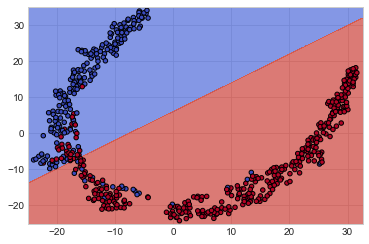

In [116]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1,c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors='k');

-> 유방암 전이가 된 부분과 안된 부분의 구분

- 파이프라인으로 cross validation 확인

In [117]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    2.8s finished


{'fit_time': array([0.00649214, 0.00649858, 0.00424194, 0.01151419, 0.00349569]),
 'score_time': array([0.00100255, 0.0009985 , 0.00099683, 0.00199294, 0.00100017]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

- 최적의 파라미터 찾기

In [118]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [119]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [120]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [121]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.9736842105263158


-> 처음보다는 성능이 0.01정도 좋아짐

# 2. 붓꽃

In [122]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [123]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [124]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9666666666666667


### 시각화 

In [125]:
# 구분되는 선을 보여주기
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

In [126]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #x와 y의 값을 넣어주기
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [131]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

- SVC 결과 확인

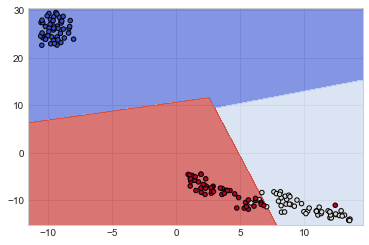

In [132]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1,c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors='k');

-> 붓꽃 종류 3개로 구분됨

- 파이프라인으로 cross validation 확인

In [133]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099516, 0.00199461, 0.00199461, 0.00199461, 0.00099945]),
 'score_time': array([0.        , 0.        , 0.        , 0.00099683, 0.00099683]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

- 최적의 파라미터 찾기

In [134]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [135]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [136]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [137]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9666666666666667


-> 처음보다는 성능이 거의 똑같음

# 3. 와인

In [145]:
X, y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [146]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [147]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 1.0


### 시각화 

In [148]:
# 구분되는 선을 보여주기
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

In [149]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #x와 y의 값을 넣어주기
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [150]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

- SVC 결과 확인

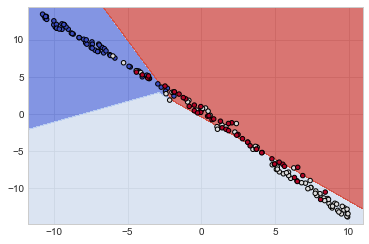

In [151]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1,c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors='k');

-> 차원이 축소되어 그렇지만 점수가 좋은 걸 보면 잘 구분됨

- 파이프라인으로 cross validation 확인

In [152]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00199342, 0.00199342, 0.00250387, 0.00250387, 0.00250387]),
 'score_time': array([0.       , 0.       , 0.       , 0.       , 0.0010128]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

- 최적의 파라미터 찾기

In [153]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [154]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

# kernel SVC

# 1. 유방암

In [157]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [158]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [159]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.9473684210526315


### 시각화 

In [112]:
# 구분되는 선을 보여주기
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

In [113]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #x와 y의 값을 넣어주기
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [160]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

- SVC 결과 확인

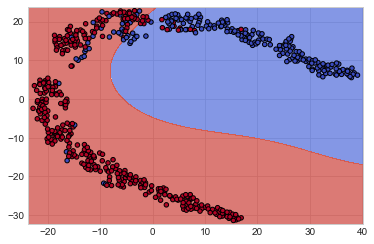

In [161]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1,c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors='k');

-> 유방암 전이가 된 부분과 안된 부분의 구분

- 파이프라인으로 cross validation 확인

In [162]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00598383, 0.00549459, 0.00551629, 0.00549293, 0.0054965 ]),
 'score_time': array([0.00350881, 0.00299525, 0.00299478, 0.00199842, 0.00301981]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

- 최적의 파라미터 찾기

In [163]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [164]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [165]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [166]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.989010989010989
평가 데이터 점수: 0.9473684210526315


-> 처음이랑 성능이 같음

# 2. 붓꽃

In [167]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [168]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [169]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9666666666666667


### 시각화 

In [125]:
# 구분되는 선을 보여주기
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

In [126]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #x와 y의 값을 넣어주기
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [170]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

- SVC 결과 확인

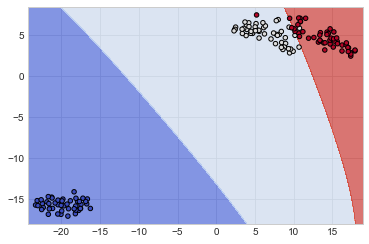

In [171]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1,c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors='k');

-> 붓꽃 종류 3개로 구분됨

- 파이프라인으로 cross validation 확인

In [172]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.6s finished


{'fit_time': array([0.00150728, 0.00199771, 0.00099802, 0.00199771, 0.00099802]),
 'score_time': array([0.00099945, 0.00099444, 0.00099969, 0.00099444, 0.00099969]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

- 최적의 파라미터 찾기

In [173]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [174]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [175]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [176]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9666666666666667


-> 처음보다는 성능이 거의 똑같음

# 3. 와인

In [177]:
X, y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [178]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [179]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9444444444444444


### 시각화 

In [148]:
# 구분되는 선을 보여주기
def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

In [149]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #x와 y의 값을 넣어주기
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [180]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

- SVC 결과 확인

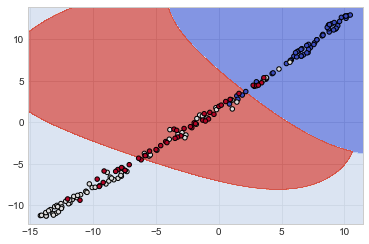

In [181]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1,c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors='k');

-> 차원이 축소되어 그렇지만 점수가 좋은 걸 보면 잘 구분됨

- 파이프라인으로 cross validation 확인

In [182]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator = estimator, X = X, y = y, 
    cv = 5, n_jobs = multiprocessing.cpu_count(),
    verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0019958 , 0.0019958 , 0.0009985 , 0.00256157, 0.00156307]),
 'score_time': array([0.00150943, 0.00156307, 0.00156307, 0.00100112, 0.00100112]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

- 최적의 파라미터 찾기

In [183]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid, 
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [184]:
# 최적의 파라미터
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [185]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9444444444444444
